# Normal Probability Plots, Continued

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# customise sns
sns.set_style("whitegrid")

## About

In a previous notebook, we used `scipy.stats.probplot` to produce a normal probability plot.
We expand on this further in this notebook by producing two further plots using the `tuple` of `arrays` returned by the function.

1. A "mirrored" plot that swaps the dependent and indendent variables.
2. A residual plot.

Let us first repeat the activity, as a reminder of what we did previously.

## Computer activity B9 

> Data on the blood plasma nicotine levels of 55 smokers are contained in the worksheet plasma.mwx. Obtain a normal probability plot for these data.
> Is a normal distribution a plausible model for the variation in blood plasma nicotine levels?

In [2]:
# import the dataset
data = pd.read_csv("plasma.csv")

We will use `scipy.stats.probplot` to produce the Normal probability plot.
(See [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)).

The method returns a tuple of arrays.
The data used to produce the plot is the 0th element of the tuple.
For example, using `res`, the data is stored in `res[0]`.

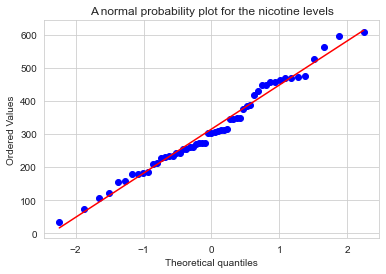

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(data["Level"], plot=ax)
ax.set_title("A normal probability plot for the nicotine levels")
plt.show()

## Plot 1: Draw a plot reflected in $y=x$

The variable `res` holds a reference to a tuple of tuples.
From the documentation, this tuple contains:

> (`osm`, `osr`) : tuple of ndarrays
>
> Tuple of theoretical quantiles (`osm`, or order statistic medians) and ordered responses (`osr`).
> osr is simply sorted input x.
>
> (`slope`, `intercept`, `r`) : tuple of floats, optional
>
> Tuple containing the result of the least-squares fit, if that is performed by `probplot`.
> `r` is the square root of the coefficient of determination.
> If `fit=False` and `plot=None`, this tuple is not returned.

We are interested in the first tuple returned for this activity.

Let us append `res[0]` to two columns in a DataFrame.

In [4]:
df = pd.DataFrame()

df["X"] = res[0][1]  # Append x (osr)
df["Quantiles"] = res[0][0]  # Append quantiles (osm)

In [5]:
df.head()

,X,Quantiles
0,33,-2.240674
1,74,-1.875104
2,106,-1.660060
3,123,-1.502274
4,155,-1.374940


We can now generate a plot with a linear regession line of best fit for this data that matches the output of **M248** by changing the column that is mapped to each axis.
We will use `seaborn.regplot()` for this activity.
(See [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)).

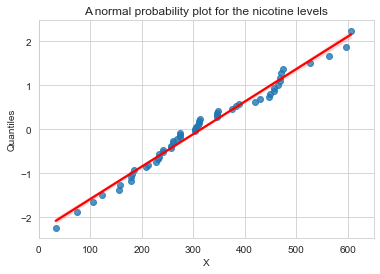

In [6]:
# declare the plot
ax = sns.regplot(data=df,
                 x="X",
                 y="Quantiles",
                 line_kws={"color": "r"})

# adjust x-axis, set the title
ax.set(xlim=(0, 650),
       title="A normal probability plot for the nicotine levels")

plt.show()

The plot now better fits that drawn by Minitab in **M248**.

## Plot 2: Draw a residual plot

We have the equation of the original best-fit line in `res[1]`, where its slope is held in `res[1][0]`, the intercept in `res[1][1]`.
Let us now draw a residual plot of the original normal probability plot.

Let us add a third column to our DataFrame holding the residual.
Recall that `residual = data - fit`, where `fit` = $a + bx$.
Here, our $x$ refers to the column `Quantiles` and $y$ to column `X`.


In [7]:
df["Residual"] = df["X"] - (res[1][1] + res[1][0]*df["Quantiles"])

In [8]:
df.head()

,X,Quantiles,Residual
0,33,-2.240674,16.706013
1,74,-1.875104,8.986353
2,106,-1.660060,12.327451
3,123,-1.502274,8.299315
4,155,-1.374940,23.329385


Let us draw the residual plot.

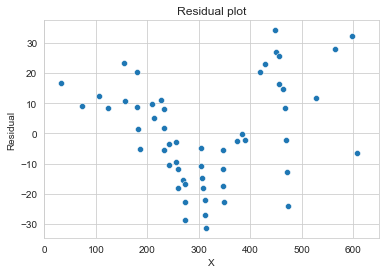

In [9]:
ax1= sns.scatterplot(data=df,
                     x="X",
                     y="Residual")
# adjust the axes, set the title
ax1.set(xlim=(0, 650),
        title="Residual plot")
plt.show()

The activity concludes that the points lie roughly on a straight line, so a normal distribution is plausible.
However there does seem to a pattern in the distribution of the residuals, indicating there maybe an underlying relationship that is not strictly linear.